# Name-Sai Prasanna

## LETSGROWMORE - Data Science Internship-Aug 2021

## Task-1-- IRIS FLOWER CLASSIFICATION ML Project

## Dataset Link: 
- http://archive.ics.uci.edu/ml/machine-learning-databases/iris/

## Problem statement

- Predicting the class of the iris based on the four features  (sepal_length,sepal_width,petal_length,petal_width)

# Importing libraries

In [1]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns            
%matplotlib inline                


from sklearn.model_selection import train_test_split    
from numpy import median         
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix  

# Reading  dataset

In [2]:
data=pd.read_csv(r'C://Users//saipr//Downloads/iris.data',header=None)
header_list=['sepal_length','sepal_width','petal_length','petal_width','species']
data.to_csv('iris.csv',header=header_list,index=False)
df =pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#to return top five rows of dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Analysing  data

In [4]:
#To check the random data we use sample 
sample_data=df.sample(n=5)

In [5]:
sample_data

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,Iris-virginica
35,5.0,3.2,1.2,0.2,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
121,5.6,2.8,4.9,2.0,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica


In [6]:
#to know summary of dataset info function is used 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
#to know labels of dataframe
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
#To check count of null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#To return statistics of dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#to return how many unique values are there in each column
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [12]:
#to return unique items in the species column
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:

df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
5.4           3.4          1.7           0.2          Iris-setosa        1
5.5           2.5          4.0           1.3          Iris-versicolor    1
              2.4          3.8           1.1          Iris-versicolor    1
                                                                        ..
6.3           2.5          4.9           1.5          Iris-versicolor    1
              2.3          4.4           1.3          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
              2.9          4.3           1.3          Iris-versicolor    1
4.3           3.0          1.1           0.1          Iris-setosa        1
Length: 147, dtype: int64

In [14]:
df.loc[60:65]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor


In [15]:
#finding mean of species column by using groupby method
df.groupby(df.species).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [16]:
#finding median of species column by using groupby method
df.groupby(df.species).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


# Exploratory Data Analysis

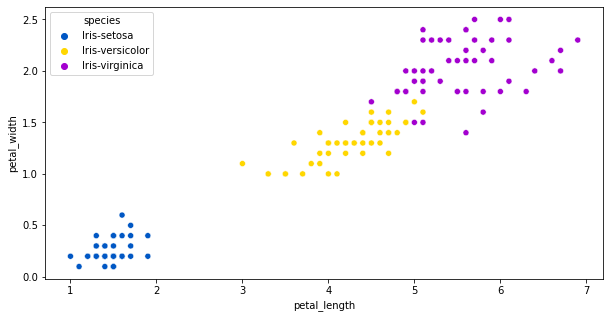

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species',palette='prism')
plt.show()

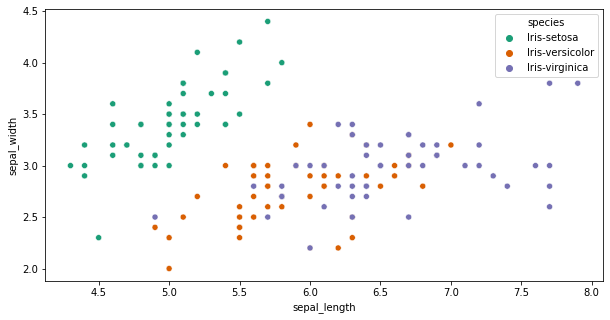

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species',palette='Dark2')
plt.show()

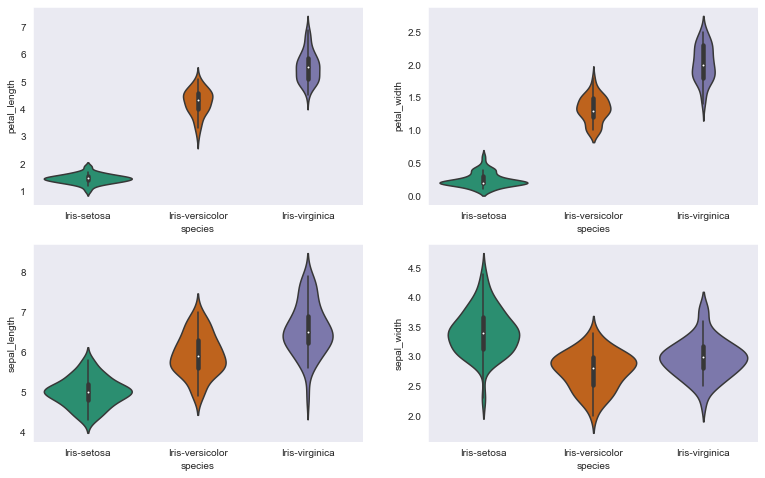

In [19]:
#to plot categorical values violin plot is used mostly
sns.set_style('dark')
sns.set_palette('Dark2')
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sns.violinplot(data=df,x='species',y='petal_length')
plt.subplot(2,2,2)
sns.violinplot(data=df,x='species',y='petal_width')
plt.subplot(2,2,3)
sns.violinplot(data=df,x='species',y='sepal_length')
plt.subplot(2,2,4)
sns.violinplot(data=df,x='species',y='sepal_width')
plt.show()

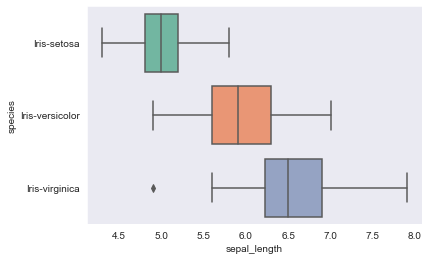

In [20]:
#box plot is used for finding central tendency and outliers
sns.set_palette('Set2')
sns.boxplot(data=df,x='sepal_length',y='species')
plt.show()

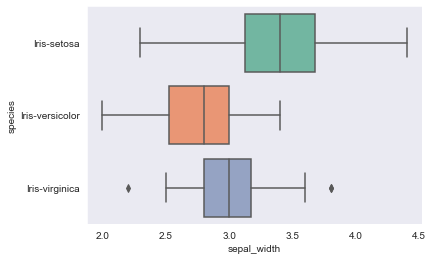

In [21]:
sns.boxplot(data=df,x='sepal_width',y='species')
plt.show()

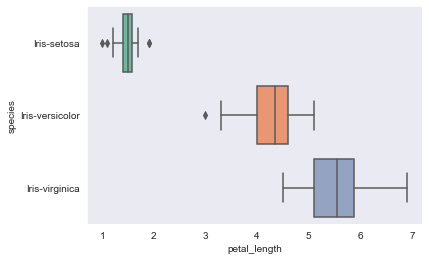

In [22]:
sns.boxplot(data=df,x='petal_length',y='species')
plt.show()

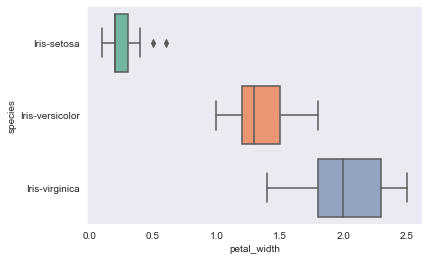

In [23]:
sns.boxplot(data=df,x='petal_width',y='species')
plt.show()

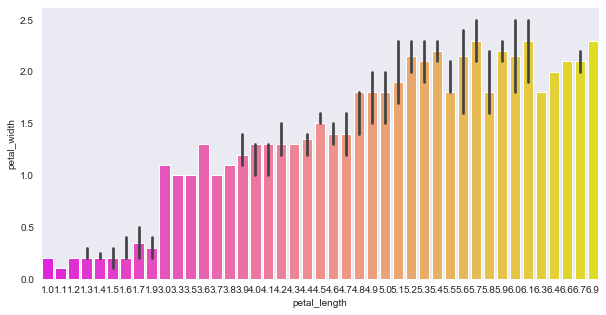

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='petal_length',y='petal_width',data=df,estimator=median,palette='spring')
plt.show()

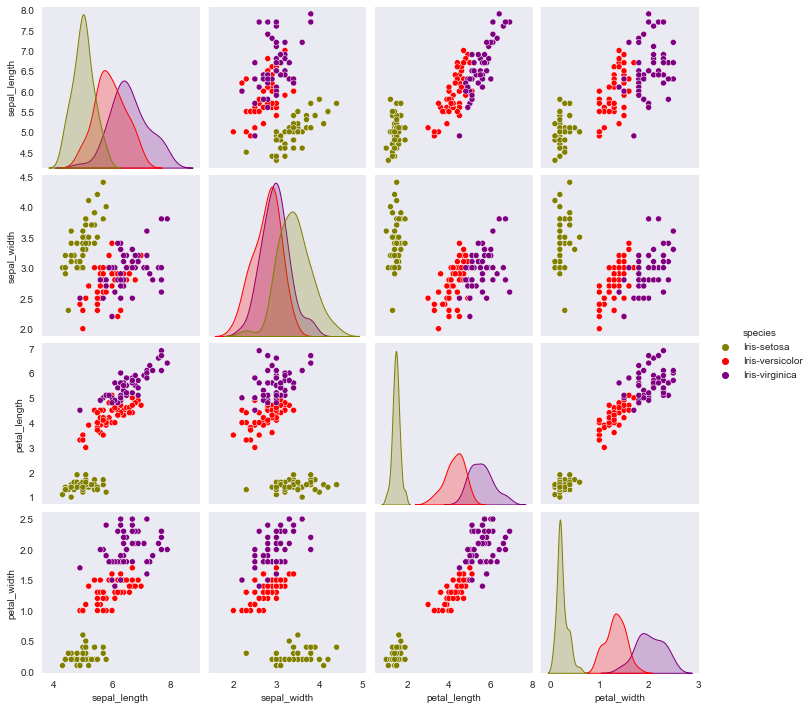

In [25]:
sns.pairplot(df,hue='species',palette='brg_r')
plt.show()

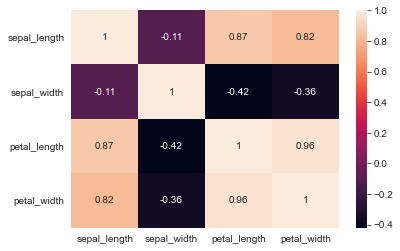

In [26]:
#plotting  heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap='rocket');

# Data preprocessing

In [27]:
#Label encoder is for converting categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [28]:
df['species']=le.fit_transform(df['species'])

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
df['species'].unique()

array([0, 1, 2])

# Splitting data into x and y

In [31]:
#x is feature so selection of whole rows and all columns except target column 
x=df.iloc[:,0:4]

In [32]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
#y is target variable so we should select all rows and last column
y=df.iloc[:,-1]


In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [36]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5


In [37]:
y_train.head()

54     1
108    2
112    2
17     0
119    2
Name: species, dtype: int32

In [38]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [39]:
y_test.head()


14     0
98     1
75     1
16     0
131    2
Name: species, dtype: int32

In [40]:
print('Length of x_train is:',len(x_train))
print('Length of x_test is:',len(x_test))
print('Length of y_train is:',len(y_train))
print('Length of y_test is:',len(y_test))




Length of x_train is: 112
Length of x_test is: 38
Length of y_train is: 112
Length of y_test is: 38


# Training the model  by different classification algorithms

# Logistic Regression 

In [41]:
#importing Logistic Regression from sklearn library
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [42]:
#fitting training data into model
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
#By predicting the values of x_test we get y_pred values
y_pred=lr.predict(x_test)
y_pred


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [44]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix of Logistic Regression: \n',cm)
print('Accuracy score of Logistic Regression',accuracy_score(y_test,y_pred))

Confusion matrix of Logistic Regression: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy score of Logistic Regression 0.9736842105263158


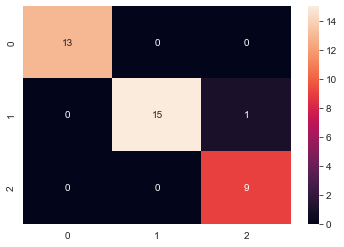

In [45]:
sns.heatmap(cm,annot=True)
plt.show()

# Random Forest Classifier

In [46]:
#importing RandomForestClassifier from sklearn

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

In [47]:
#fitting training data into RandomRorestClassifier
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
#getting y_pred values by passing x_test
y_pred=rf.predict(x_test)

In [49]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [50]:
cf=confusion_matrix(y_test,y_pred)
print(cf)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [51]:
accuracy_score(y_test,y_pred)

0.9736842105263158

<AxesSubplot:>

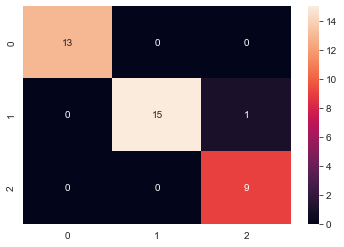

In [52]:
sns.heatmap(cm,annot=True)

# KNN Algorithm

## 2 neighbours

In [53]:
#importing K-Nearest neighbour from sklearn library 
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=2)

In [54]:
#fitting the data for training
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [55]:
#predicting the values by passing x_test
y_pred=knc.predict(x_test)

In [56]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [57]:
#By plotting confusion matrix we can check how many null values are predicted
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix of KNN for 2 neighbours: \n',cm)
print('Accuracy score of KNN for 2 neighbours: ',accuracy_score(y_test,y_pred))

Confusion matrix of KNN for 2 neighbours: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
Accuracy score of KNN for 2 neighbours:  1.0


<AxesSubplot:>

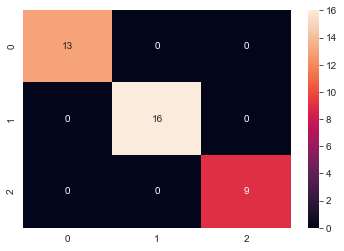

In [58]:
#Heat map is the visualization of confusion matrix
sns.heatmap(cm,annot=True)

## 3 neighbours

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)

In [60]:
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_pred=knc.predict(x_test)

In [62]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [63]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix of KNN for 3 neighbours: \n',cm)
print('Accuracy of KNN for 3 neighbours:..',accuracy_score(y_test,y_pred))

Confusion matrix of KNN for 3 neighbours: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
Accuracy of KNN for 3 neighbours:.. 1.0


<AxesSubplot:>

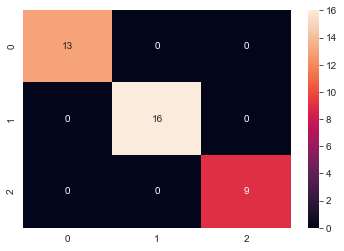

In [64]:
sns.heatmap(cm,annot=True)

# Support Vector Machine

In [65]:
#importing Support Vector Machine model from sklearn
from sklearn.svm import SVC
sv=SVC(random_state=50,kernel='poly')
#kernel='poly'

In [66]:
#fitting training data into model
sv.fit(x_train,y_train)

SVC(kernel='poly', random_state=50)

In [67]:
#getting y_pred values by passing x_test
y_pred=sv.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [68]:
#finding accuracy by passing y_test and y_pred
print('Accuracy of SVM....',accuracy_score(y_test,y_pred))
print('Confusion matrix of SVM \n',confusion_matrix(y_test,y_pred))

Accuracy of SVM.... 0.9736842105263158
Confusion matrix of SVM 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


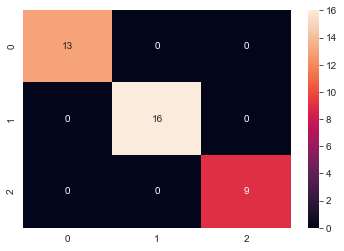

In [69]:
#Visualization of confusion matrix
sns.heatmap(cm,annot=True);

# Conclusion